In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from core import *


In [7]:
import pylab
sns.set(font_scale=1.5)
pylab.rcParams['figure.figsize'] = (12, 8)

In [12]:
sp=get_sp_future()
pct_returns=sp.pct_change()

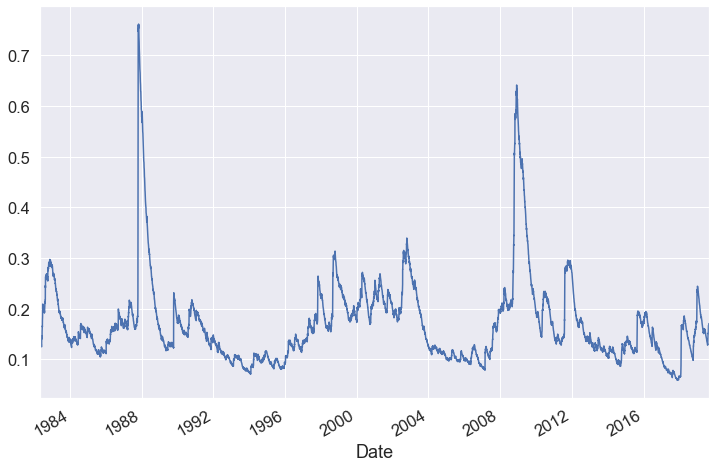

In [21]:
roll_vol=(pd.Series.ewm(pct_returns,60).std()*16.)
roll_vol.plot()

# Rolling z score
$$ \frac{x_i-\bar{x}}{\sigma}$$

In [75]:
short_days=1
long_days=20
z=(pd.Series.ewm(pct_returns,short_days).mean()-pd.Series.ewm(pct_returns,long_days).mean())/(pd.Series.ewm(pct_returns,long_days).std())

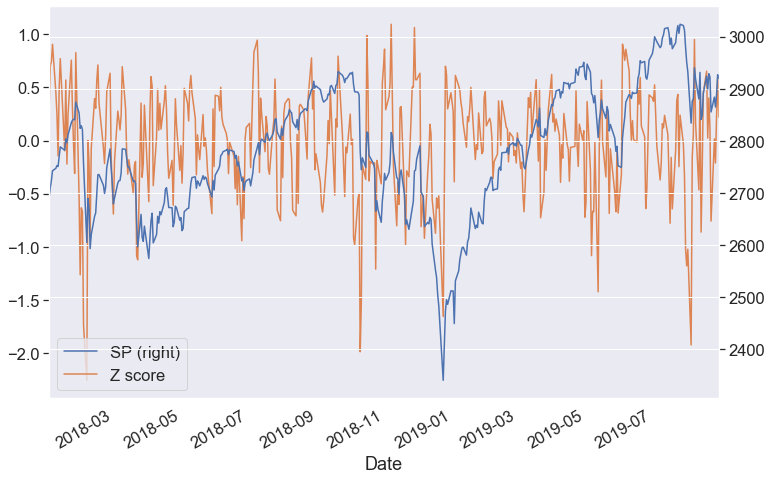

In [76]:
df=pd.DataFrame()
df['SP']=sp
df['Z score']=z
df['2018':].plot(secondary_y='SP')

In [77]:
if z.abs().iloc[-1]>2:
    print('fe')

In [78]:
z.tail()

Date
2019-08-26    0.014866
2019-08-27   -0.211125
2019-08-28    0.243422
2019-08-29    0.608162
2019-08-30    0.219680
Name: Last, dtype: float64

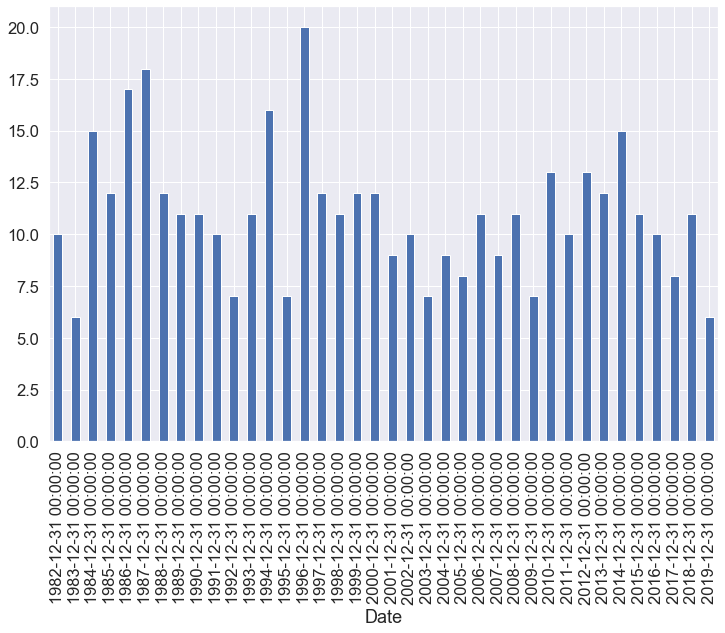

In [81]:
z[z.abs()>1].resample(rule='a').count().plot(kind='bar')

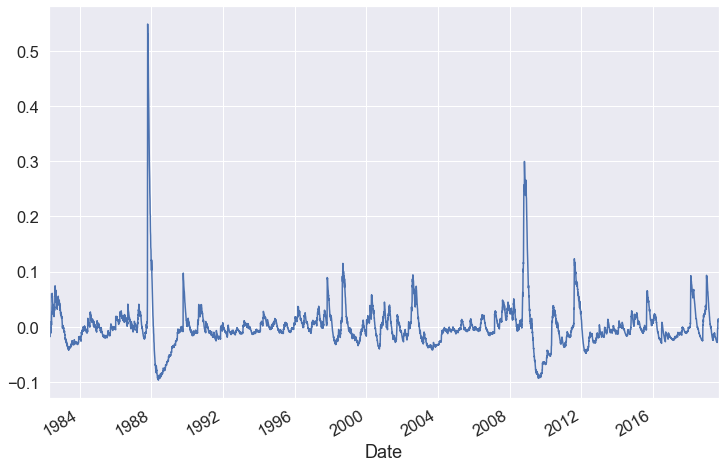

In [23]:
(roll_vol-pd.Series.ewm(roll_vol,60).mean()).plot()